In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4978,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
4979,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200
4980,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
4981,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600
4982,2024-06-05,176.535004,177.970001,175.289993,177.070007,177.070007,15222900


In [4]:
data_training = data[data['Date'] < '2024-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4870,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
4871,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
4872,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
4873,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [5]:
data_test = data[data['Date'] >= '2024-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
4875,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
4876,2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
4877,2024-01-04,139.850006,140.634995,138.009995,138.039993,138.039993,18253300
4878,2024-01-05,138.352005,138.809998,136.850006,137.389999,137.389999,15433200
4879,2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300
...,...,...,...,...,...,...,...
4978,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
4979,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200
4980,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
4981,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600


In [6]:
training = data_training.drop(['Date', 'Adj Close'], axis = 1)
training.head()

,Open,High,Low,Close,Volume
0,2.490664,2.591785,2.390042,2.499133,897427216
1,2.515820,2.716817,2.503118,2.697639,458857488
2,2.758411,2.826406,2.716070,2.724787,366857939
3,2.770615,2.779581,2.579581,2.611960,306396159
4,2.614201,2.689918,2.587302,2.640104,184645512


In [7]:
scaler = MinMaxScaler()
training = scaler.fit_transform(training)
training

array([[1.35039790e-04, 3.86337794e-04, 0.00000000e+00, 5.54588186e-05,
        5.43577158e-01],
       [3.03427861e-04, 1.22230316e-03, 7.66630177e-04, 1.39474206e-03,
        2.77885883e-01],
       [1.92727230e-03, 1.95501646e-03, 2.21039746e-03, 1.57790459e-03,
        2.22151354e-01],
       ...,
       [9.39532022e-01, 9.41296827e-01, 9.40090478e-01, 9.37463786e-01,
        1.03775573e-02],
       [9.32972170e-01, 9.34276495e-01, 9.38578642e-01, 9.36384275e-01,
        7.29039450e-03],
       [9.25140391e-01, 9.28693635e-01, 9.32286947e-01, 9.34022850e-01,
        8.91409470e-03]])

In [8]:
training.shape[0]

4875

In [9]:
X_train = []
y_train = []
days_to_take = 60

for i in range(days_to_take, training.shape[0]):  # 60 
    X_train.append(training[i-days_to_take:i])
    y_train.append(training[i, 0])  

X_train = np.array(X_train)
y_train = np.array(y_train) 

X_train.shape, y_train.shape    


((4815, 60, 5), (4815,))

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [48]:
regression = Sequential()

regression.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 120, activation = 'relu'))
regression.add(Dropout(0.2))

regression.add(Dense(units = 1))

In [49]:
regression.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 60)         │        15,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 60, 100)        │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │       106,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,561 (935.79 KB)

 Trainable params: 239,561 (935.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
regression.compile(optimizer='adam', 
                   loss = 'mean_squared_error')

In [52]:
regression.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 0.0318
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 0.0018
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - loss: 0.0017
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - loss: 0.0017
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - loss: 0.0015
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - loss: 0.0013
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - loss: 0.0013
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - loss: 0.0012
Epoch 9/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - loss: 0.0011
Epoch 10/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - loss: 0.0012
Epoch 11/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 227ms/step - loss: 9.9505e-04
Epoch 12/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - loss: 0.0013
Epoch 13/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 137ms/step - loss: 0.0012
Epoch 14/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - loss: 9.3084e-04
Epoch 1

In [53]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4875,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
4876,2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
4877,2024-01-04,139.850006,140.634995,138.009995,138.039993,138.039993,18253300
4878,2024-01-05,138.352005,138.809998,136.850006,137.389999,137.389999,15433200
4879,2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300


In [54]:
data_training.tail(days_to_take)

,Date,Open,High,Low,Close,Adj Close,Volume
4815,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.990005,15922900
4816,2023-10-06,134.940002,139.186005,134.940002,138.729996,138.729996,20819300
4817,2023-10-09,137.990005,139.970001,136.699997,139.500000,139.500000,16599100
4818,2023-10-10,139.509995,140.740005,138.429993,139.199997,139.199997,19554900
4819,2023-10-11,139.850006,142.220001,139.839996,141.699997,141.699997,20146300
4820,2023-10-12,142.160004,142.380005,139.449997,140.289993,140.289993,18173100
4821,2023-10-13,140.649994,141.339996,137.970001,138.580002,138.580002,19438700
4822,2023-10-16,139.729996,140.904999,139.320007,140.490005,140.490005,17345600
4823,2023-10-17,140.029999,141.250000,138.529007,140.990005,140.990005,17424000
4824,2023-10-18,140.750000,141.990005,138.705002,139.279999,139.279999,18304900


In [55]:
past_days = data_training.tail(days_to_take)
df = past_days.append(data_test, ignore_index = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9228\3452313642.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_days.append(data_test, ignore_index = True)


In [56]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.990005,15922900
1,2023-10-06,134.940002,139.186005,134.940002,138.729996,138.729996,20819300
2,2023-10-09,137.990005,139.970001,136.699997,139.500000,139.500000,16599100
3,2023-10-10,139.509995,140.740005,138.429993,139.199997,139.199997,19554900
4,2023-10-11,139.850006,142.220001,139.839996,141.699997,141.699997,20146300
...,...,...,...,...,...,...,...
163,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
164,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200
165,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
166,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600


In [57]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.990005,15922900
1,2023-10-06,134.940002,139.186005,134.940002,138.729996,138.729996,20819300
2,2023-10-09,137.990005,139.970001,136.699997,139.500000,139.500000,16599100
3,2023-10-10,139.509995,140.740005,138.429993,139.199997,139.199997,19554900
4,2023-10-11,139.850006,142.220001,139.839996,141.699997,141.699997,20146300
...,...,...,...,...,...,...,...
163,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
164,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28085200
165,2024-06-03,173.880005,175.860001,172.449997,174.419998,174.419998,20742800
166,2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600


In [58]:
df.drop(['Date', 'Adj Close'], axis = 1, inplace = True)    
input = scaler.transform(df)
input

array([[0.89468389, 0.89569818, 0.89537111, 0.90069367, 0.00955032],
       [0.8867183 , 0.91365684, 0.8986593 , 0.91917988, 0.01251662],
       [0.90713427, 0.91889865, 0.91059168, 0.92437495, 0.00995997],
       [0.91730871, 0.9240469 , 0.92232067, 0.92235089, 0.01175063],
       [0.91958466, 0.93394217, 0.93188017, 0.93921792, 0.01210891],
       [0.93504722, 0.93501196, 0.92923607, 0.92970489, 0.01091352],
       [0.92493958, 0.92805845, 0.91920202, 0.9181679 , 0.01168024],
       [0.91878134, 0.92515006, 0.92835476, 0.93105433, 0.01041221],
       [0.92078949, 0.92745674, 0.92299196, 0.93442774, 0.01045971],
       [0.925609  , 0.93240442, 0.92418517, 0.92289065, 0.01099337],
       [0.91924995, 0.9258187 , 0.92347332, 0.92086658, 0.01312964],
       [0.91115047, 0.9126806 , 0.90750687, 0.90575378, 0.01502142],
       [0.89535321, 0.91254696, 0.89981186, 0.91358001, 0.01249324],
       [0.91496596, 0.92384634, 0.92449024, 0.92855794, 0.01597939],
       [0.85211161, 0.85290775, 0.

In [59]:
X_test = []
y_test = []

for i in range(days_to_take, input.shape[0]):
    X_test.append(input[i-days_to_take:i])
    y_test.append(input[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [60]:
y_pred = regression.predict(X_test)
y_pred

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020994B99D00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step


array([[0.84726626],
       [0.84274685],
       [0.83975226],
       [0.8383404 ],
       [0.8371372 ],
       [0.83816355],
       [0.84256834],
       [0.8499697 ],
       [0.8577212 ],
       [0.8631196 ],
       [0.86520976],
       [0.8629805 ],
       [0.86182076],
       [0.86508554],
       [0.8718164 ],
       [0.8781405 ],
       [0.8848396 ],
       [0.89243084],
       [0.8990808 ],
       [0.90416235],
       [0.9063488 ],
       [0.8944725 ],
       [0.88022673],
       [0.8673742 ],
       [0.8631979 ],
       [0.86666   ],
       [0.8736959 ],
       [0.88080025],
       [0.88756377],
       [0.89245373],
       [0.89134836],
       [0.8882377 ],
       [0.88128775],
       [0.8737324 ],
       [0.86731875],
       [0.8651172 ],
       [0.86815137],
       [0.8729087 ],
       [0.87090504],
       [0.86433595],
       [0.85526407],
       [0.8485261 ],
       [0.8453775 ],
       [0.8400386 ],
       [0.8324728 ],
       [0.8258626 ],
       [0.82293904],
       [0.824

In [61]:
scaler.scale_

array([6.69375383e-03, 6.68601135e-03, 6.77977800e-03, 6.74681491e-03,
       6.05813073e-10])

In [62]:
scale = 1/6.69375383e-03
scale

149.39300509053825

In [63]:
y_pred = y_pred*scale
y_test = y_test*scale

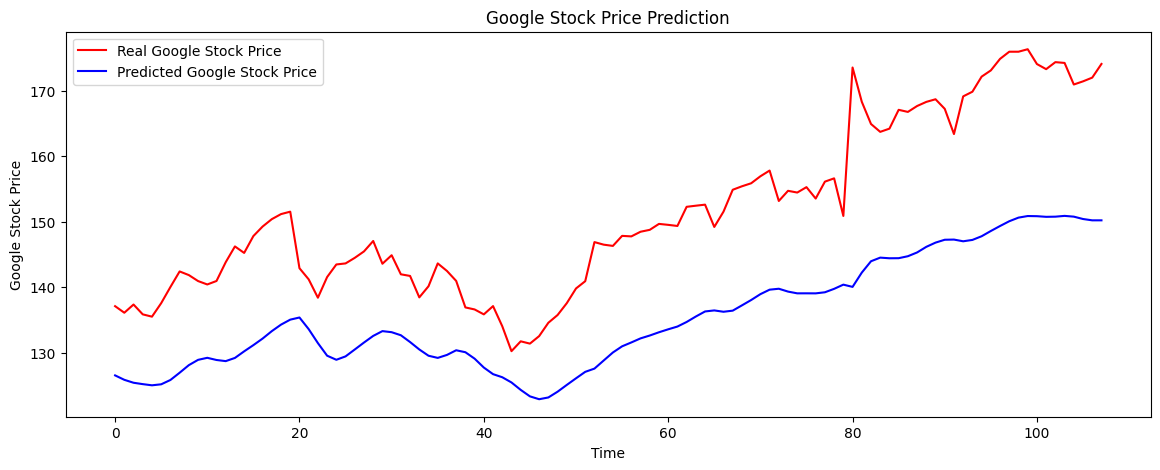

In [64]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

plt.show()